<a href="https://colab.research.google.com/github/MichalMichniak/Sieci-Neuronowe/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=ee5d06494469809bfac1ee42c494677ca35e23bdf25b46b56ad07ed4ba7f04f6
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [2]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import scale

# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]

som = MiniSom(30, 30, 64, sigma=4,
              learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data)
som.train(data, 5000, random_order=True, verbose=True)  # random training

/usr/local/lib/python3.10/dist-packages/minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 2.9946903910362024


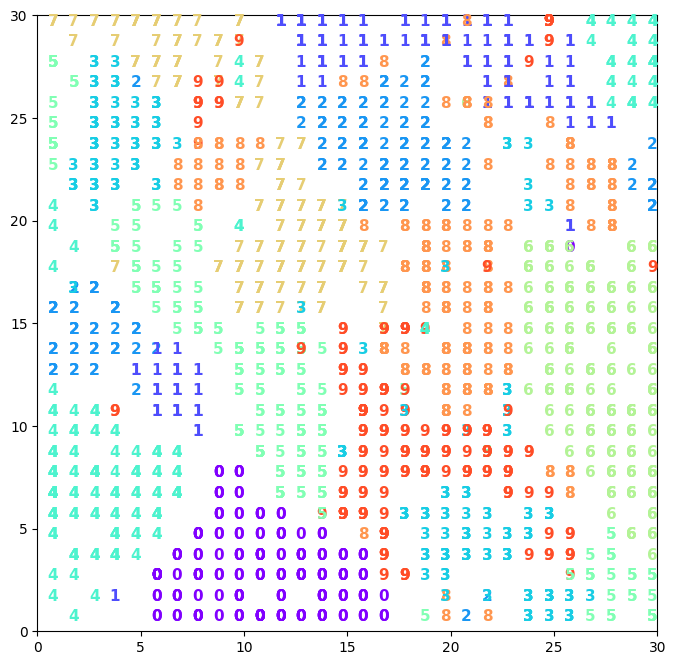

In [3]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

In [4]:
!pip install minisom

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from minisom import MiniSom
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [6]:
# load data
dataset = load_breast_cancer()
targets = dataset.target
target_names = dataset.target_names
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data.index.name = "Sample ID"

# visualise data
pd.set_option('display.max_columns', None)
display(data.head())
print(data.shape)
display(pd.DataFrame(target_names).head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Sample ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 30)


,0
0,malignant
1,benign


In [7]:
# set hyperparameters
x = 30
y = 30
input_len = data.shape[1]
sigma = 1
learning_rate = 0.5
iter = 100

# init
data = np.array(data)
som = MiniSom(x=x,
              y=y,
              input_len=input_len,
              sigma=sigma,
              learning_rate=learning_rate)
som.random_weights_init(data)

# training
som.train_random(data, iter)

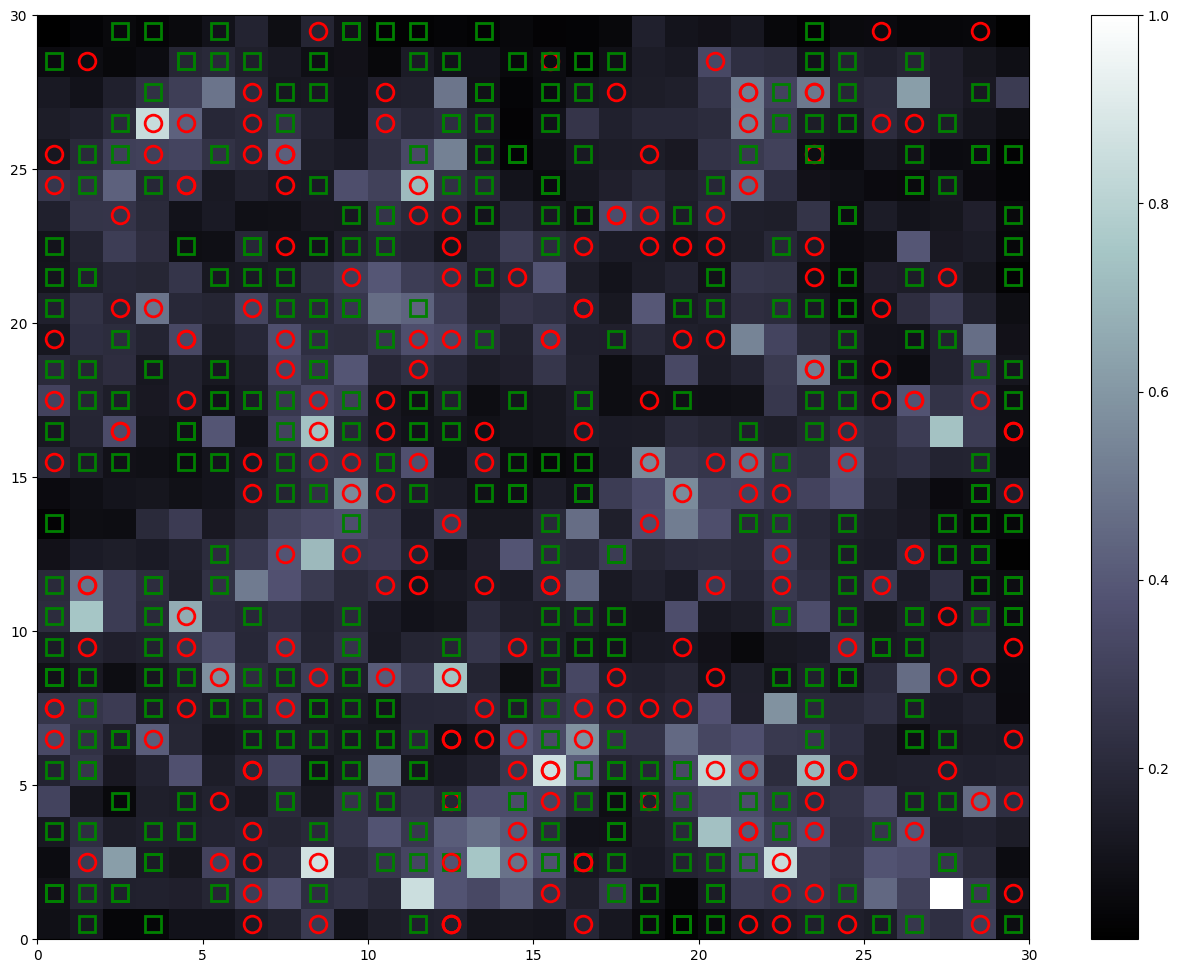

In [8]:
def plot_som(som):
  from pylab import plot,axis,show,pcolor,colorbar,bone

  plt.figure(figsize=(16, 12))
  bone()
  pcolor(som.distance_map().T) #distance map as background
  colorbar()

  # use different colors and markers for each label
  markers = ['o', 's', 'D']
  colors = ['r', 'g', 'b']
  for cnt,xx in enumerate(data):
    w = som.winner(xx)
    plot(w[0]+.5,w[1]+.5,markers[targets[cnt]],markerfacecolor='None',
        markeredgecolor=colors[targets[cnt]], markersize=12,markeredgewidth=2)
  axis([0, som._weights.shape[0],0,som._weights.shape[1]])
  show()

plot_som(som)

In [9]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

space = {
    'sig': hp.uniform('sig', 0.001, 5),
    'learning_rate': hp.uniform('learning_rate', 0.001, 5)
    }

def som_fn(space):
  sig = space['sig']
  learning_rate = space['learning_rate']
  val = MiniSom(x=x,
                y=y,
                input_len=input_len,
                sigma=sig,
                learning_rate=learning_rate
                ).quantization_error(data)
  return {'loss': val, 'status': STATUS_OK}

trials = Trials()
best = fmin(fn=som_fn,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print('best: {}'.format(best))

space = {
    'sig': hp.uniform('sig', 0.001, 5),
    'learning_rate': hp.uniform('learning_rate', 0.001, 5)
    }

def som_fn(space):
  sig = space['sig']
  learning_rate = space['learning_rate']
  val = MiniSom(x=x,
                y=y,
                max_evals=100,
                trials=trials)

print('best: {}'.format(best))

100%|██████████| 100/100 [00:01<00:00, 64.01trial/s, best loss: 1111.1681813029209]
best: {'learning_rate': 4.6307453766389575, 'sig': 1.1325784421392038}
best: {'learning_rate': 4.6307453766389575, 'sig': 1.1325784421392038}


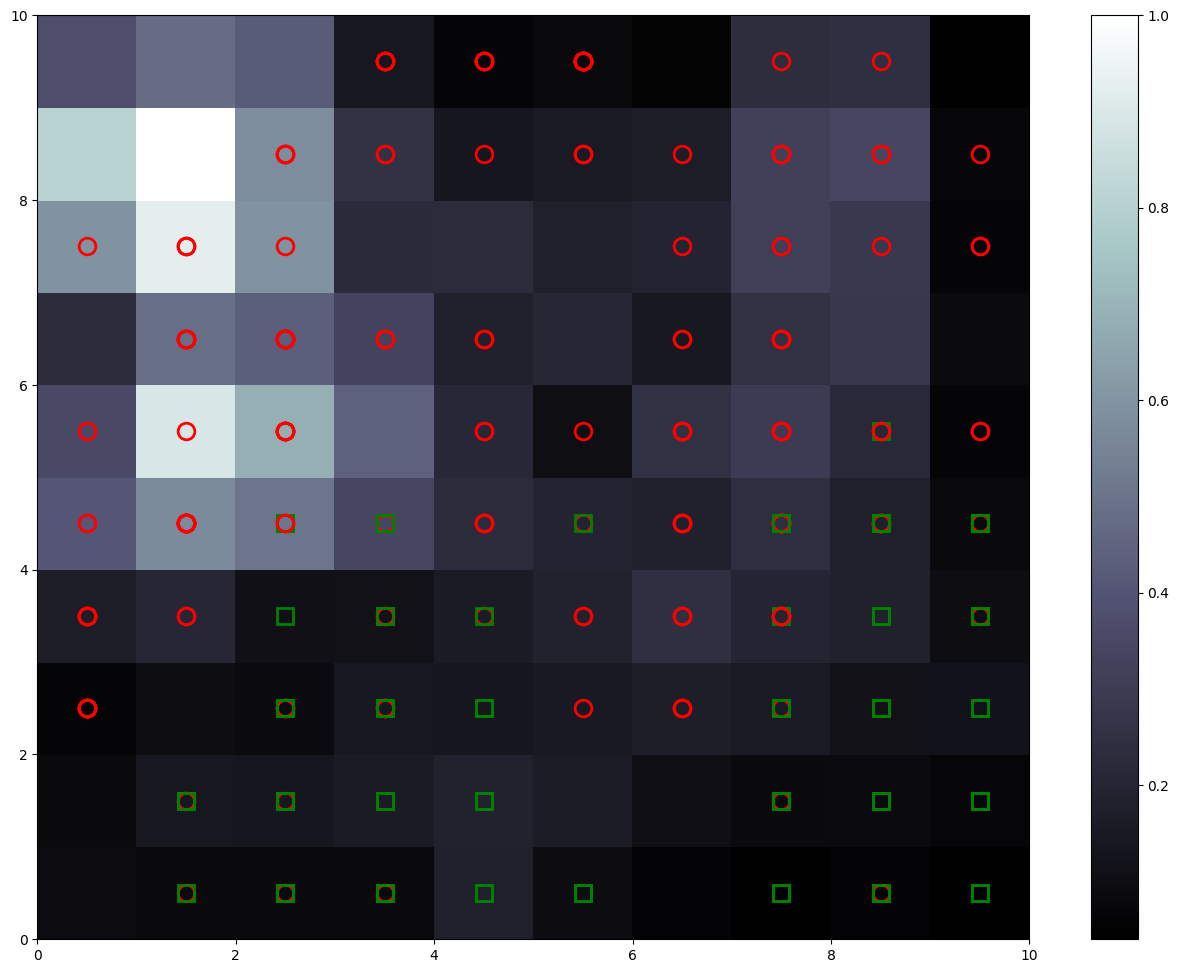

In [10]:
sigma = best['sig']
learning_rate = best['learning_rate']
x = int(np.sqrt(5 * np.sqrt(data.shape[0])))
y = x

som = MiniSom(x=x,
              y=y,
              input_len=input_len,
              sigma=sigma,
              learning_rate=learning_rate)
som.random_weights_init(data)

# training
som.train_random(data, iter)

plot_som(som)